In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [59]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,confusion_matrixfrom tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

In [60]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


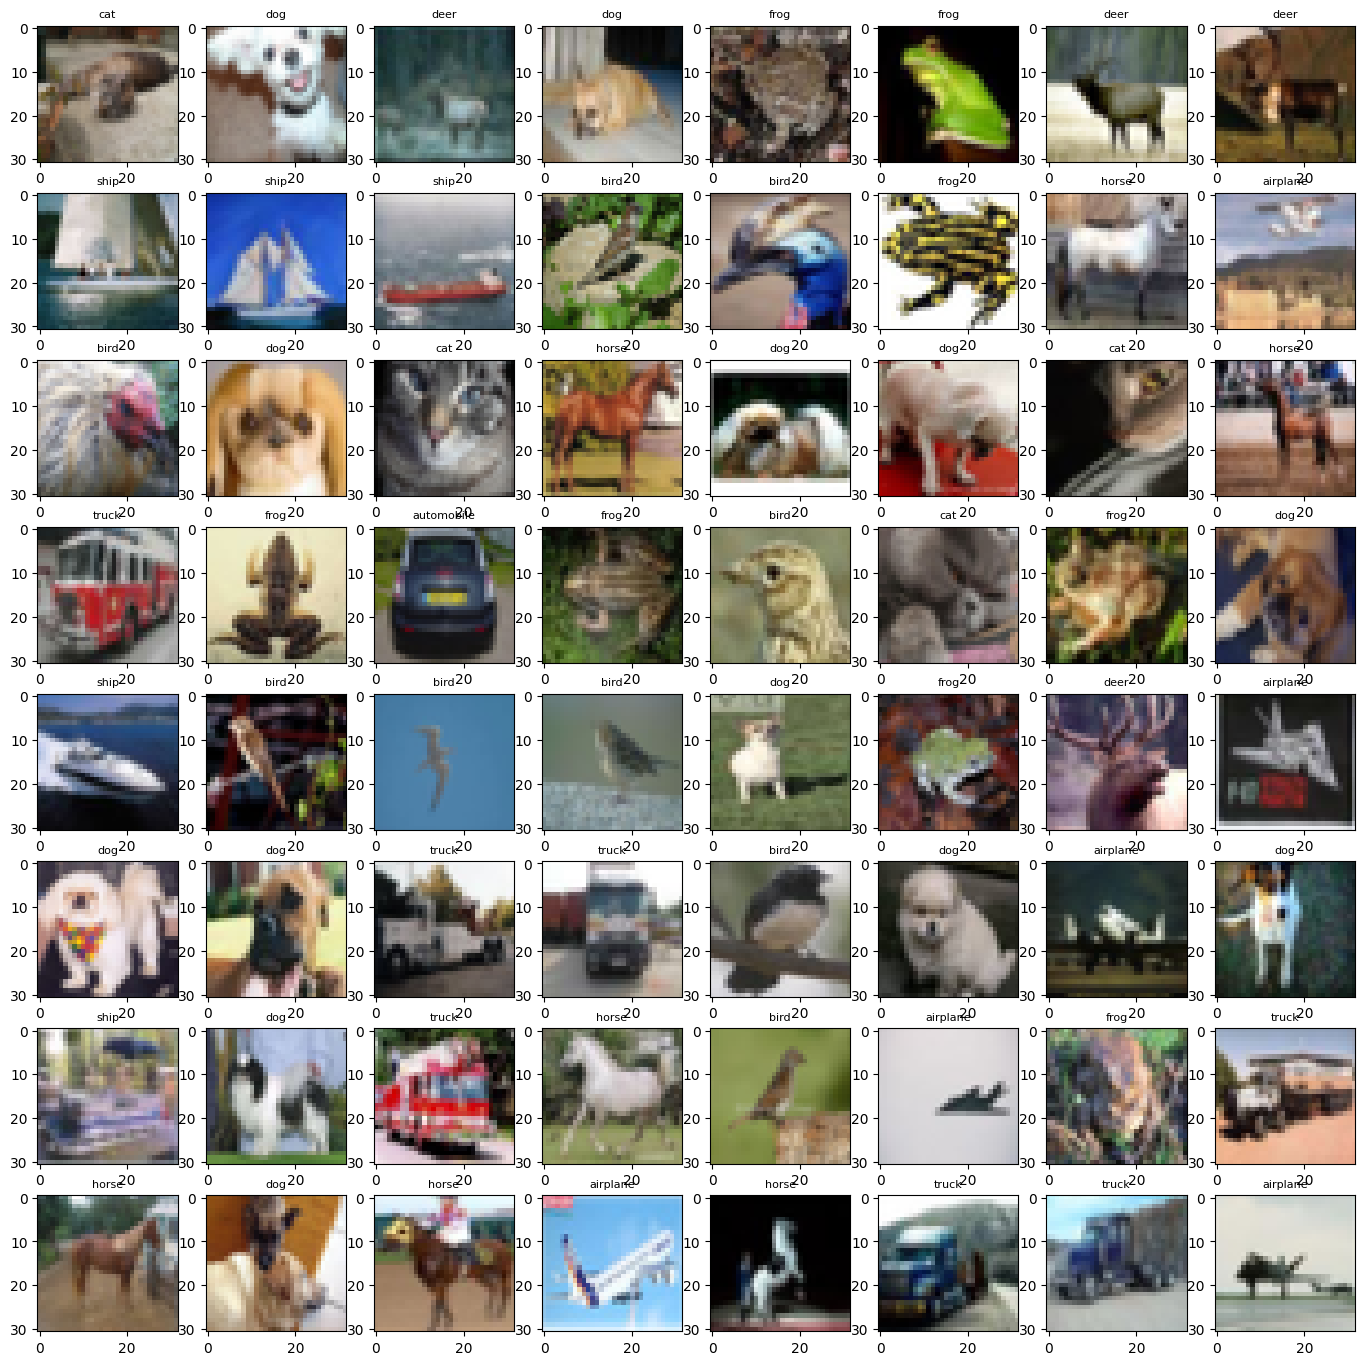

In [69]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig,axes=plt.subplots(8,8,figsize=(17,17))
axes=axes.ravel() 

n_samples=8*8
rand_ind=np.random.randint(0,len(X_train),size=64)
for i,index in enumerate(rand_ind):
    image=X_train[index,1:] 
    label_index=int(y_train[index])
    axes[i].imshow(image,cmap='viridis')
    axes[i].set_title(labels[label_index],fontsize=11)
    axes[i].set_title(labels[label_index],fontsize=11)

plt.show()



In [71]:
class_names=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
cla,counts=np.unique(y_train,return_counts=True)

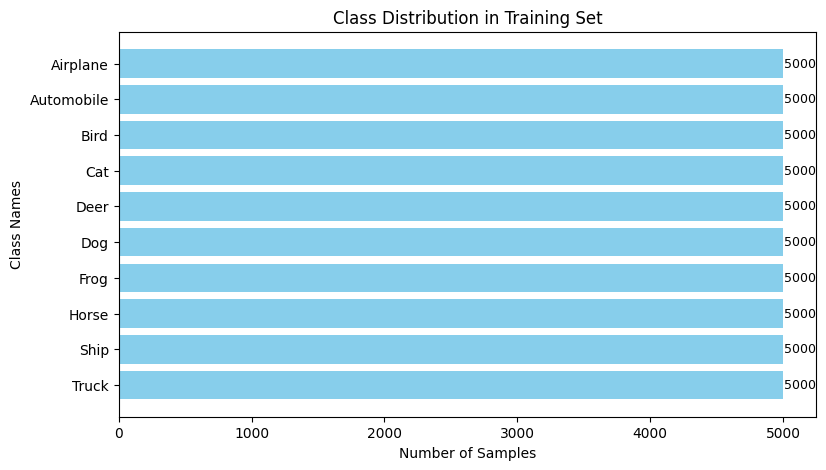

In [75]:
plt.figure(figsize=(9,5))
plt.barh(class_names,counts,color='skyblue')
plt.xlabel('Number of Samples')
plt.gca().invert_yaxis()
plt.ylabel('Class Names')
plt.title('Class Distribution in Training Set')
for i,count in enumerate(counts):
    plt.text(count+10,i,str(count),va='center',fontsize=9)

plt.show()

In [80]:
import numpy as np
import matplotlib.pyplot as plt
class_names=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

test_cla,test_counts=np.unique(y_test,return_counts=True)
sor_indices=np.argsort(-test_counts)
sor_test_cla=test_cla[sor_indices]
sor_test_counts=test_counts[sor_indices]
sor_test_class_names=[class_names[i] for i in sor_test_cla]


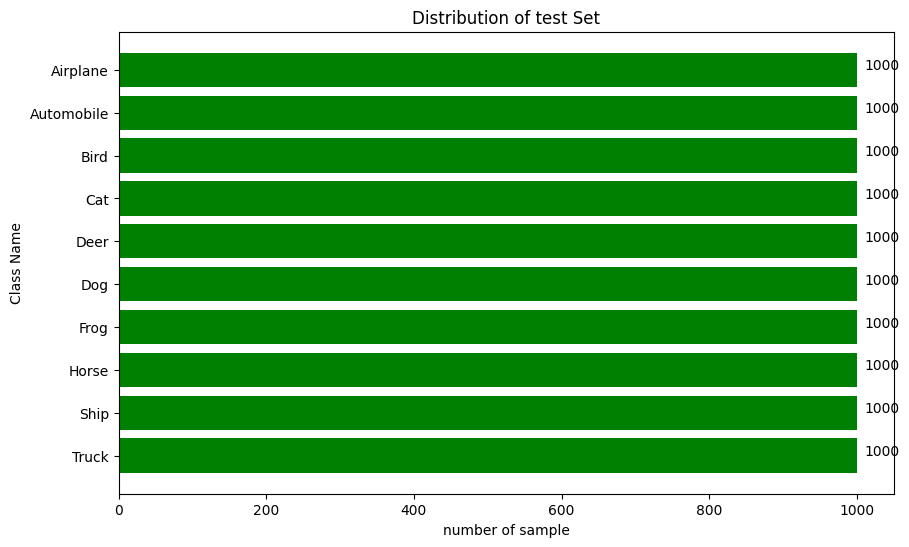

In [83]:
plt.figure(figsize=(10,6))
plt.barh(sor_test_class_names,sor_test_counts,color='green')
plt.xlabel('number of sample')
plt.ylabel('Class Name')
plt.title('Distribution of test Set')
plt.gca().invert_yaxis()
for i,count in enumerate(sor_test_counts):
    plt.text(count+10,i,str(count),fontsize=10)
plt.show()

In [84]:
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0


In [85]:
num_cla=10
y_train=to_categorical(y_train,num_cla)
y_test=to_categorical(y_test,num_cla)

In [86]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False
)
datagen.fit(X_train)

In [87]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [88]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [89]:
from keras.optimizers import SGD
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))
optim=SGD(learning_rate=0.001,momentum=0.8)
MET=[
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=MET)
model.summary()

#tried implmenting gradient descent right from scratch but cifar data set made it difficult


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 12, 12, 64)      

In [90]:
es=EarlyStopping(monitor='val_loss',mode='auto',patience='2')

In [91]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(
    width_shift_range=0.05,       # i just tried shifting the height and width since other augmentaion were not giving good accuracy
    height_shift_range=0.05,
)
datagen.fit(X_train)
augmented_ite=datagen.flow(X_train,y_train,batch_size=32)
steps_per_epoch=X_train.shape[0]//32

history=model.fit(augmented_ite,epochs=10,steps_per_epoch=steps_per_epoch,validation_data=(X_test,y_test))

Epoch 1/10
1562/1562 [==============================] - 42s 24ms/step - loss: 1.4642 - accuracy: 0.4779 - precision: 0.6562 - recall: 0.2948 - val_loss: 1.3877 - val_accuracy: 0.5204 - val_precision: 0.6426 - val_recall: 0.4152
Epoch 2/10
1562/1562 [==============================] - 38s 24ms/step - loss: 1.0742 - accuracy: 0.6226 - precision: 0.7513 - recall: 0.4951 - val_loss: 0.9820 - val_accuracy: 0.6551 - val_precision: 0.7430 - val_recall: 0.5629
Epoch 3/10
1562/1562 [==============================] - 37s 24ms/step - loss: 0.8915 - accuracy: 0.6852 - precision: 0.7880 - recall: 0.5884 - val_loss: 0.9388 - val_accuracy: 0.6843 - val_precision: 0.7724 - val_recall: 0.6066
Epoch 4/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.7917 - accuracy: 0.7233 - precision: 0.8095 - recall: 0.6415 - val_loss: 0.8010 - val_accuracy: 0.7248 - val_precision: 0.8169 - val_recall: 0.6520
Epoch 5/10
1562/1562 [==============================] - 37s 24ms/step - loss: 0.7118 - a

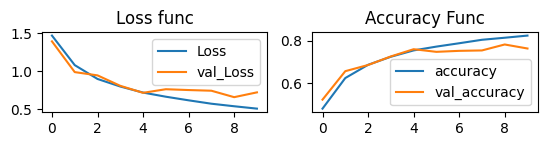

In [115]:
plt.subplot(4,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title("Loss func")
plt.legend()
plt.subplot(4,2,2)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Func')
plt.legend()

In [116]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)

313/313 [==============================] - 1s 3ms/step


In [117]:
conf_matrix=confusion_matrix(y_test,y_pred)

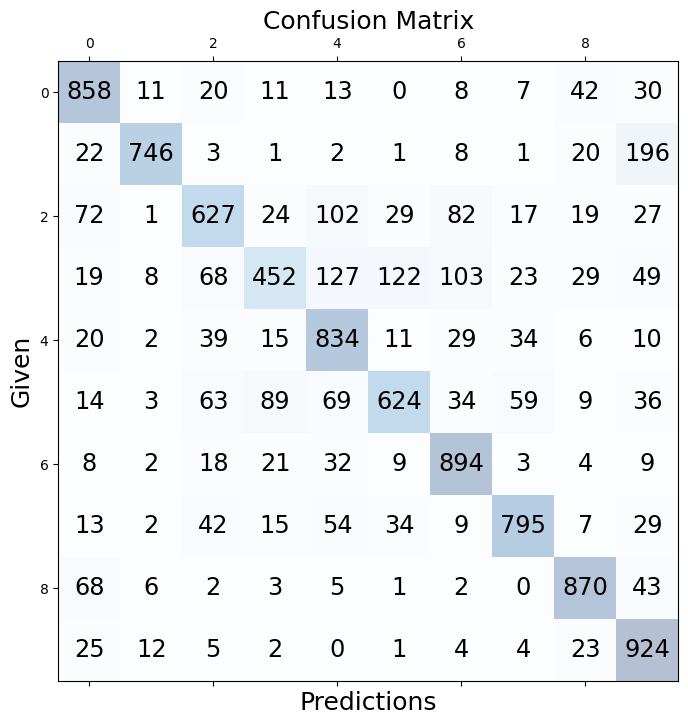

In [123]:
fig,ax=plt.subplots(figsize=(8,9))
ax.matshow(conf_matrix, cmap=plt.cm.Blues,alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='xx-large')

        
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Given',fontsize=18)
plt.title('Confusion Matrix',fontsize=18)
plt.show()
 

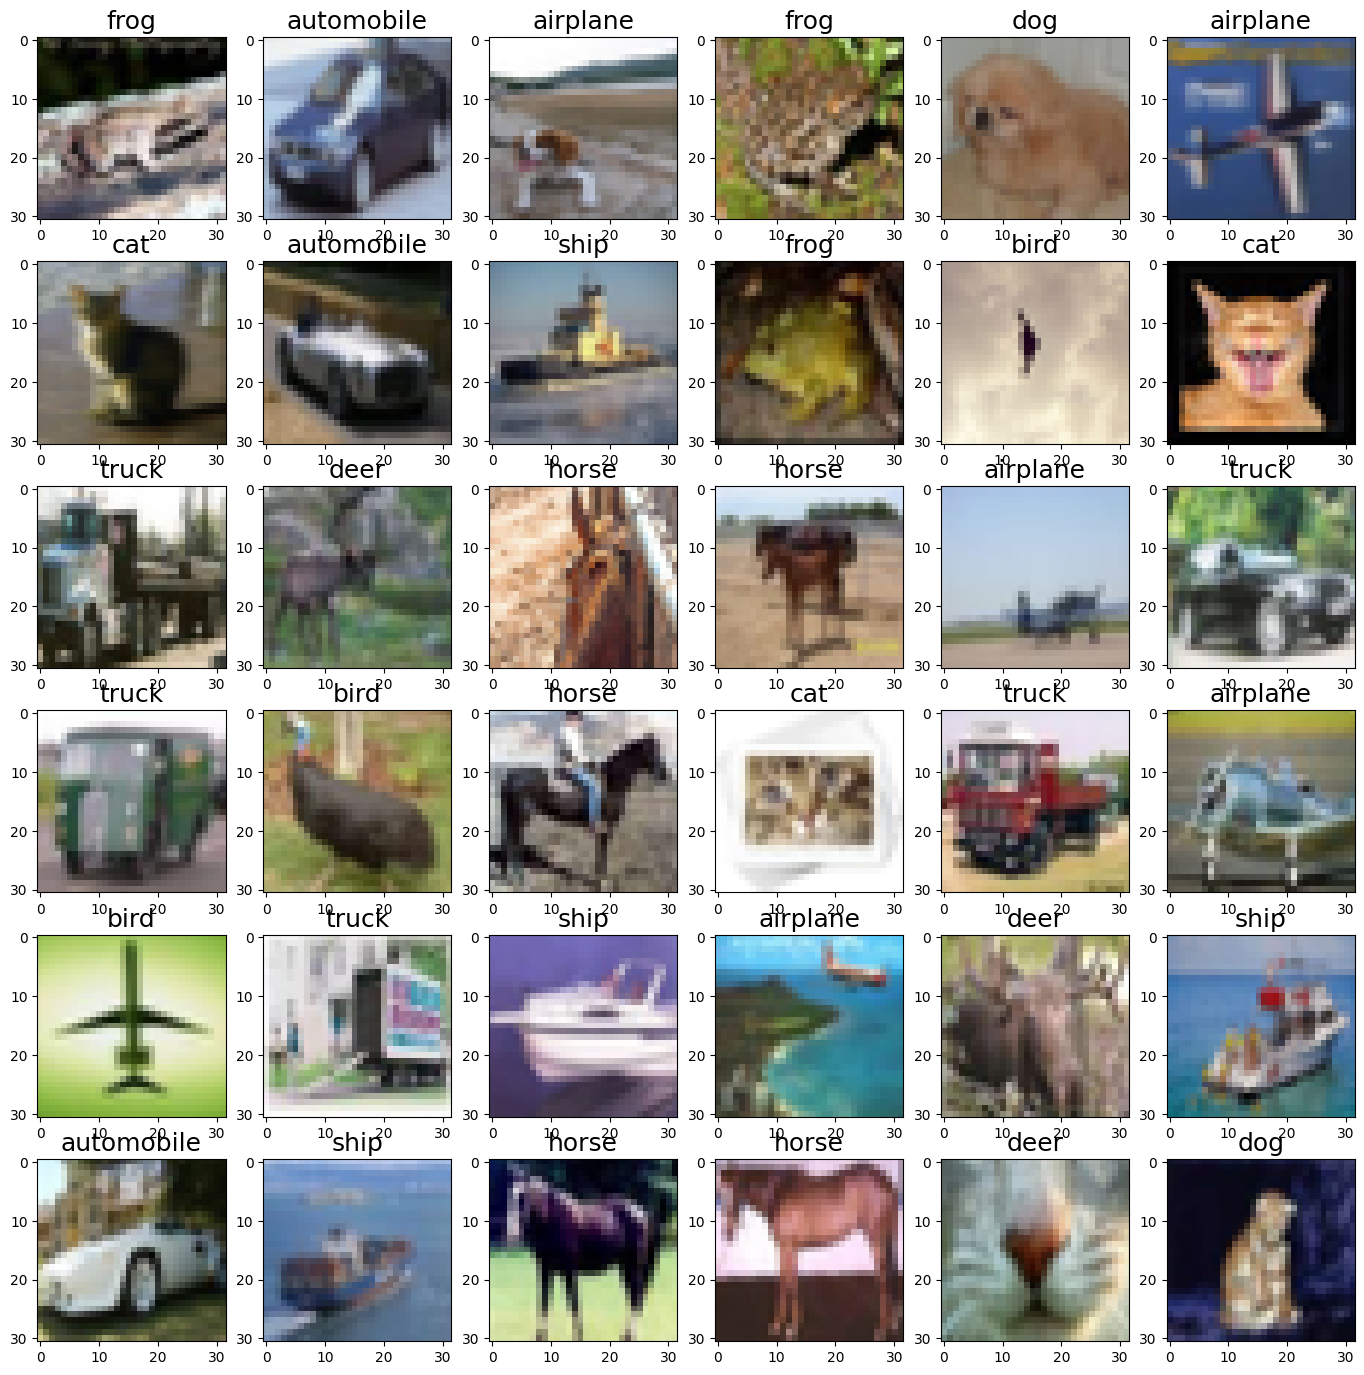

In [124]:
labels = ['airplane','automobile','bird','cat','deer', 
          'dog','frog','horse','ship','truck']
fig, axes = plt.subplots(6,6, figsize = (17,17))
axes = axes.ravel() 
for i,ax in enumerate(axes): 
    rand_index = np.random.randint(0,len(X_test))   
    ax.imshow(X_test[rand_index,1:])
    label_index = int(y_pred[rand_index])
    ax.set_title(labels[label_index], fontsize = 18)

In [ ]:
#thank you 